In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
from sklearn.pipeline import make_pipeline
warnings.filterwarnings("ignore")

In [46]:
def draw_line(coef,intercept, mi, ma):

    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[0][1]*mi - intercept)/coef[0][0]), mi],[((-coef[0][1]*ma - intercept)/coef[0][0]), ma]])
    print(points)
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

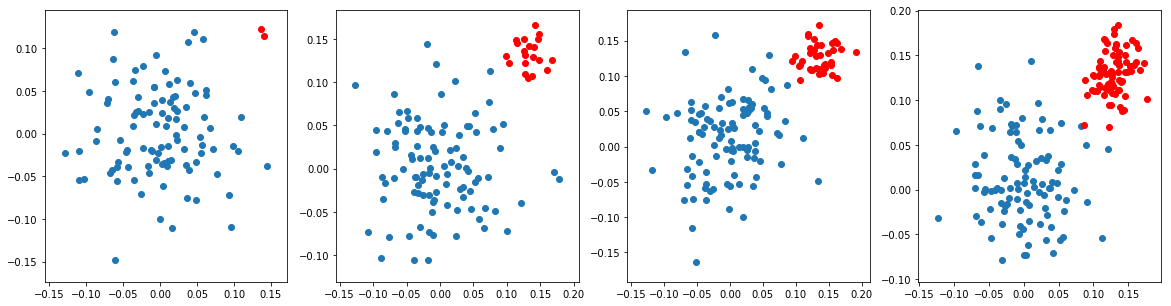

In [12]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

[LibSVM][[-0.06534087  0.01171389]]
[[array([6260.4059399]) -0.14227111722893057]
 [array([6260.1297595]) 0.1561076184876301]]
[LibSVM][[0.02591514 0.08804533]]
[[array([18.13220292]) -0.11165266611902079]
 [array([17.6411556]) 0.1415650690328842]]
[LibSVM][[ 0.0247301  -0.08451247]]
[[array([0.23667483]) -0.12134315211501878]
 [array([0.08032671]) 0.1314225065567111]]
[LibSVM][[-0.01627398 -0.02833358]]
[[array([553.45427892]) -0.0981363226656475]
 [array([553.20898551]) 0.17637944761425586]]
[LibSVM][[ 0.01807211 -0.03783871]]
[[array([0.8176533]) -0.1420980352482603]
 [array([0.54690288]) 0.16067848995704492]]
[LibSVM][[0.06270493 0.02767448]]
[[array([0.35532708]) -0.14446444522198032]
 [array([0.00709759]) 0.15249960748451696]]
[LibSVM][[-0.00065861  0.04224868]]
[[array([258.27555538]) -0.16011137721761304]
 [array([257.92973806]) 0.1892507489332126]]
[LibSVM][[0.0177974  0.00608776]]
[[array([0.42689992]) -0.12985278589291357]
 [array([0.10742799]) 0.17948982411114167]]
[LibSVM]

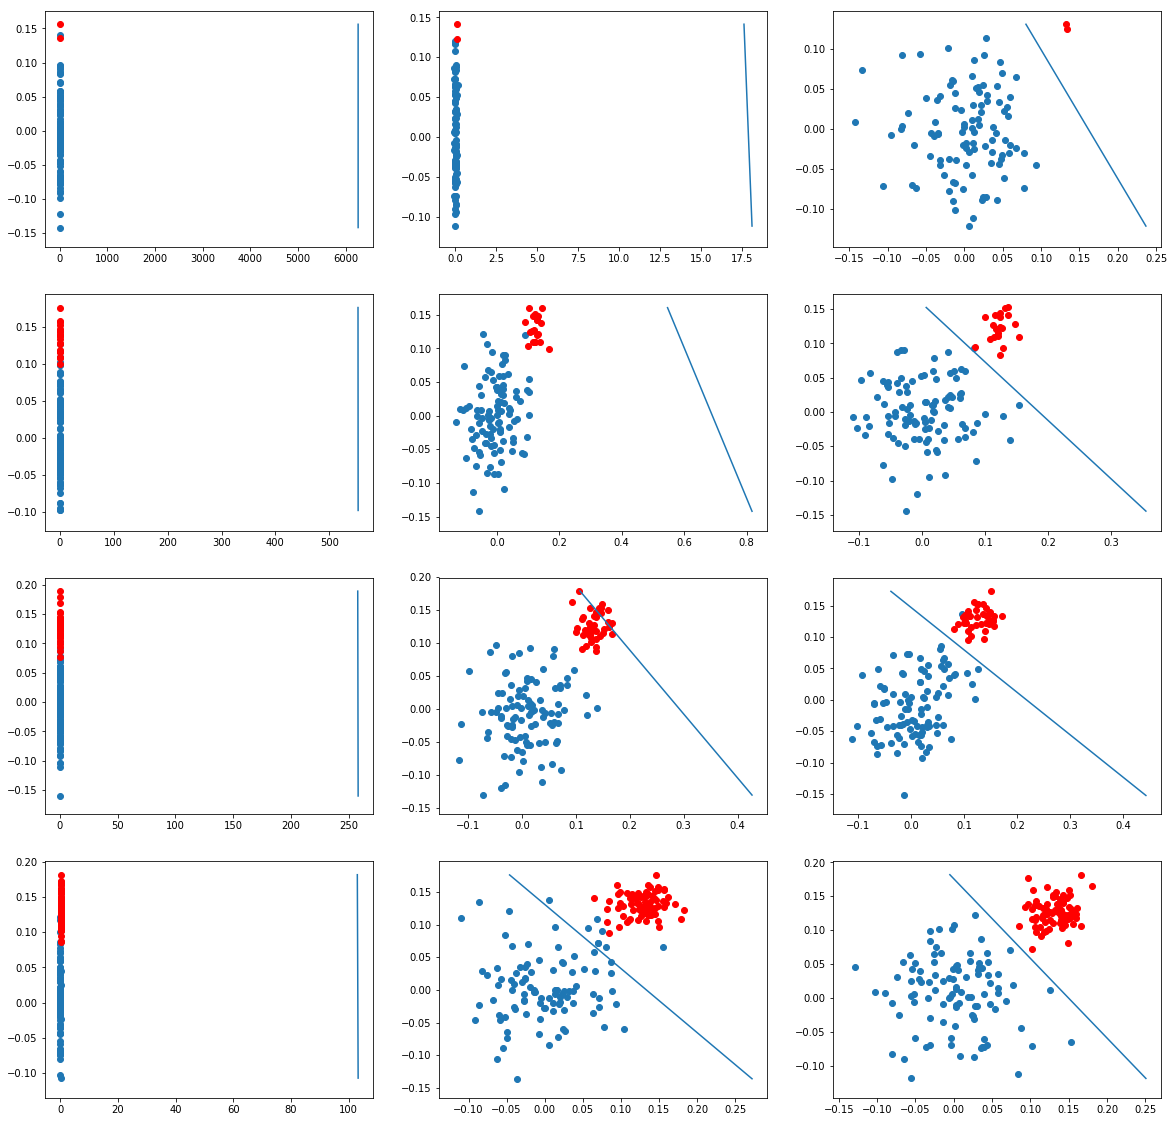

In [86]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
regularization = [0.001,1,100]
plt.figure(figsize=(20,20))
count = 0
for j,i in enumerate(ratios):
  
    for index,reg in enumerate(regularization):
        plt.subplot(4,3,count+1)
        count = count+1
        
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
              
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        clf = SVC(C=reg, kernel ='linear',gamma='auto',verbose = 2)
        clf.fit(X, y)
        draw_line(clf.coef_,clf.intercept_,min(X[:,1]),max(X[:,1]))

plt.show()
       
    

        
    
    




# Observations From Above Plot


As regularization strength increased ,tendency to not commit mistakes on train data increased.As we can see in the first row ,even if there was high imbalance ,at C =100 it tried to separate data very nicely ,which implies it is overfitting to train data which should be avoided.

With C =0.001,even with balanced data,we are not able to get optimum hyperplane,so it leads to underfitting.

With C=1,and enough balanced data (100,80),model works in better way to get optimum hyperplane without overfitting or underfitting


## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

[[array([15009.50880546]) -0.11670180785536839]
 [array([15009.2725416]) 0.16013385344475498]]
[[array([16.72052268]) -0.1320734751554843]
 [array([16.49188231]) 0.1321996520938394]]
[[array([0.45001028]) -0.10970894090481742]
 [array([0.16755203]) 0.14675601881524195]]
[[array([796.35839244]) -0.13755436336151444]
 [array([796.02718903]) 0.16933151362688098]]
[[array([1.04300633]) -0.12418848075417672]
 [array([0.72650234]) 0.16373642432265093]]
[[array([0.29443075]) -0.1187221845293332]
 [array([0.02072278]) 0.16273476257628847]]
[[array([246.9112563]) -0.10794612121477816]
 [array([246.61768372]) 0.1811553409904638]]
[[array([0.50991189]) -0.12224972697280463]
 [array([0.21781389]) 0.16331884493514165]]
[[array([0.30522766]) -0.13798152848903836]
 [array([-0.01428133]) 0.1793576292247146]]
[[array([40.51391596]) -0.1260418507982368]
 [array([40.21783879]) 0.17087916310505316]]
[[array([0.299693]) -0.13097821962368944]
 [array([0.00331732]) 0.1722047390451505]]
[[array([0.27229721]) 

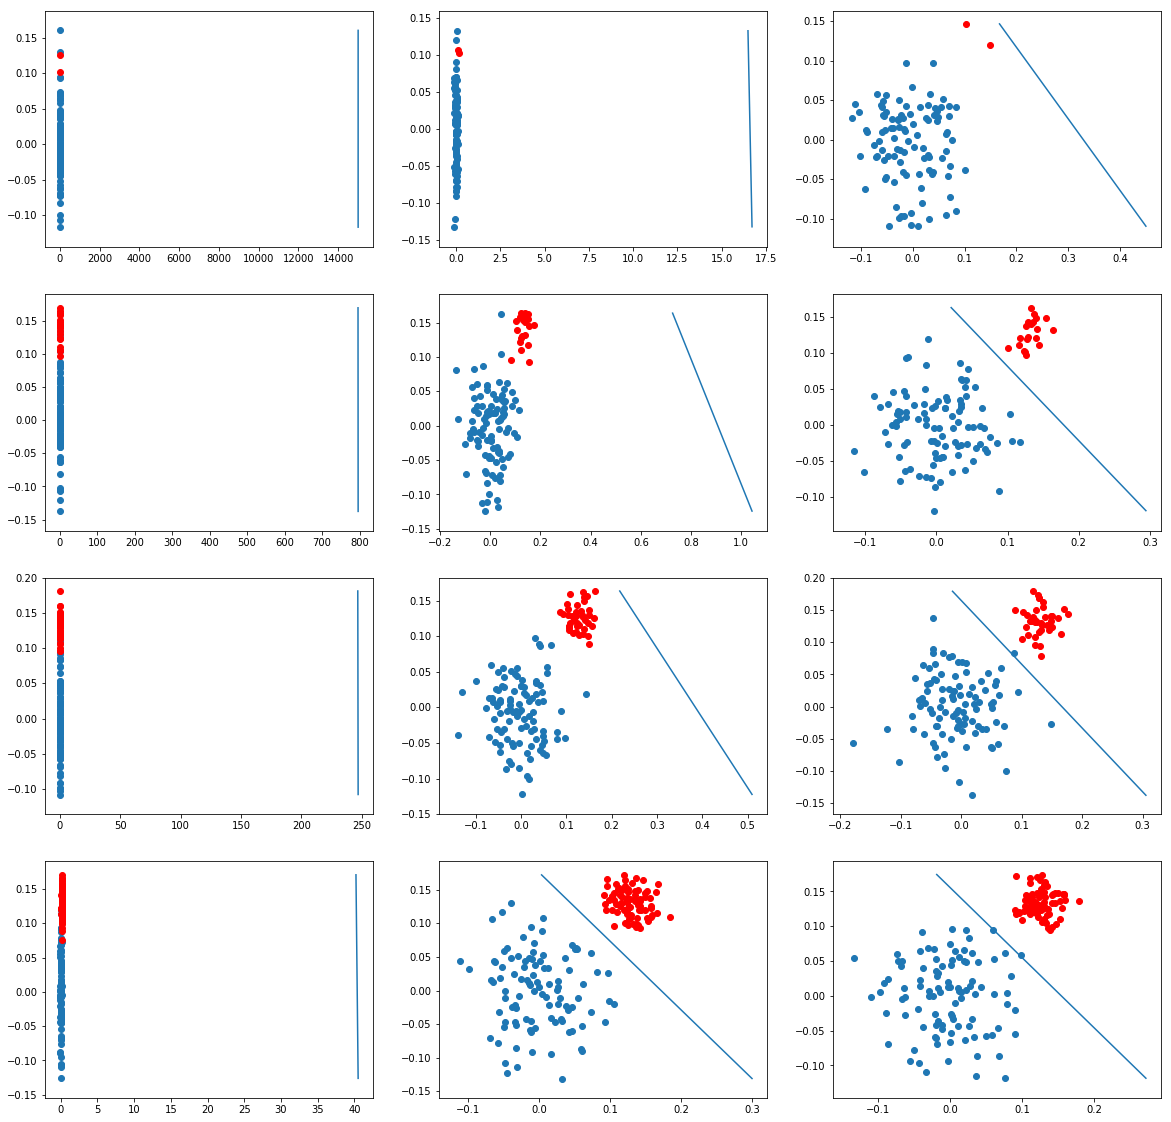

In [87]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
regularization = [0.001,1,100]
plt.figure(figsize=(20,20))
count = 0
for j,i in enumerate(ratios):
  
    for index,reg in enumerate(regularization):
        plt.subplot(4,3,count+1)
        count = count+1
        
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
              
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        clf = LogisticRegression(penalty='l2', tol=0.0001, C=reg)
        clf.fit(X, y)
        draw_line(clf.coef_,clf.intercept_,min(X[:,1]),max(X[:,1]))

plt.show()
       
    

        